<a href="https://colab.research.google.com/github/zilingggg/Image_process/blob/main/%E3%80%8Cexample1_linear_regression_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線性迴歸

可以做線性迴歸的套件很多，這次我們用以下三種方式幫我們達成目標

1. [scikitlearn](<https://scikit-learn.org/stable/>) 這個基礎的機器學習套件的 [LinearRegression](<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>)

2. [numpy](<https://numpy.org/>) 的 [polyfit](<https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html>)

3. 自己寫 minimize $\chi^2$ 的數學式

首先，引入必要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 生成資料
製造一份假......，模擬的資料
- 註：在做作業的時候，我們要用的是真實的資料
- np.randn 是高斯分佈的亂數
- python 的程式碼是會區分大小寫的!

<ErrorbarContainer object of 3 artists>

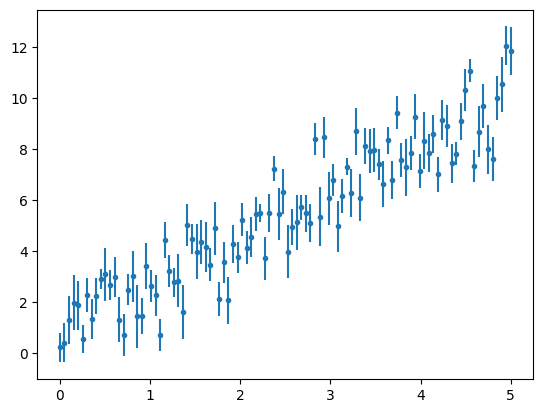

In [2]:
x = np.linspace(0, 5, 100)
y = 1.9*x + 0.8 + 1.0*np.random.randn(100)
dy = 0.8+0.2*np.random.randn(100)


plt.errorbar(x,y,dy,fmt='.')

## 用 SciKitLearn 的 LinearRegression 做線性回歸

接下來，打開一個線性迴歸的函數學習機

In [3]:
regr = LinearRegression()

此外，我們需要將資料調成 sklearn 會接受的形狀。

In [4]:
X = x.reshape(len(x), 1)
print(x)
print(X)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

把資料放進函數學習機，開始它的訓練

In [5]:
regr.fit(X, y)

LinearRegression()

用 predict 看一下訓練的成果，順便畫個圖

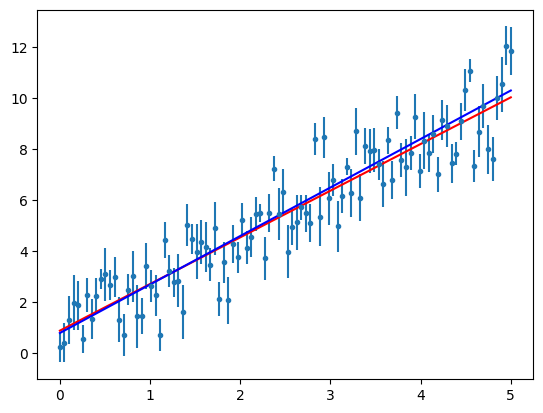

In [6]:
Y = regr.predict(X)
plt.errorbar(x,y,dy,fmt='.')
plt.plot(x, Y, 'r' )
plt.plot(x, 1.9*x + 0.8, 'b')

結果看起來不錯，會有微小誤差的原因，則是因為真實世界的資料有不可避免的雜訊。

如果想要知道最佳的參數，則可以看

In [7]:
print(regr.coef_)
print(regr.intercept_)

[1.82816716]
0.8909941609437553


其中 *regr.intercept_* 是截距， *regr.coef_* 是斜率

## 用 Numpy 的 polyfit 做線性回歸

In [8]:
fit2=np.polyfit(x,y,1)
print(fit2)

[1.82816716 0.89099416]


用 polyfit 計算出來的結果，直接是一個 array，包含斜率和截距。

接下來，我們可以把

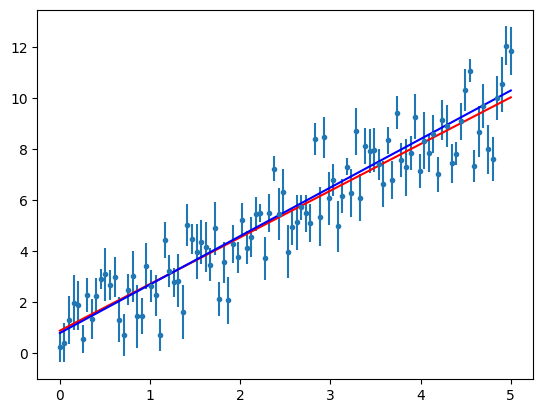

In [9]:

p2=np.poly1d(fit2)
yfit=p2(x)

plt.errorbar(x,y,dy,fmt='.')
plt.plot(x, yfit, 'r' )
plt.plot(x, 1.9*x + 0.8, 'b')

polyfit 和 LinearRegression 不同的地方在於它可以考慮誤差。我們可以用下面的式子來做 weighted fit

In [10]:
fit3=np.polyfit(x,y,1,w=1/dy,cov=True)
print(fit3)

(array([1.8371528, 0.9762615]), array([[ 0.00555977, -0.01374941],
       [-0.01374941,  0.04532776]]))


其中 w 這個參數設定了 weighting factor， cov=True 則能把 covariance matrix 也生出來給我們。其中 covariance matrix 的對角線項就是兩個參數的誤差，非對角線項就是兩個參數間的 covariance。

## 自己動手寫 linear regression

最後，我們也可以自己寫我們的 linear regression。這次我們用矩陣運算的版本

In [11]:
A=np.vstack((1/dy,x/dy)).T
b=y/dy
b=b.reshape(-1,1)


alpha=np.dot(A.T,A)
cov_matrix=np.linalg.inv(alpha)
print(cov_matrix)

parameter=np.dot(np.dot(cov_matrix,A.T),b)
print(parameter)


[[ 0.01998815 -0.00606307]
 [-0.00606307  0.00245169]]
[[0.9762615]
 [1.8371528]]


你可能會注意到這裡得到的 covariance matrix 是 np.polyfit 的 2.07 倍。這是因為這個 fitting 的 reduced $\chi^2$，定義為

$$\chi_{\nu}^2\equiv\frac{\chi^2}{N-M}=2.07$$

其中 $M$ 是參數的數量。在 numpy 的 polyfit 中，預設會將我們得到的 covariance matrix 乘上 $\chi_{\nu}^2$。如果你不想要這麼做，請手動將它除回去，或是用 scipy 的 curve_fit，並設定 absolute_sigma=True。

In [12]:
yfit3=parameter[0]+parameter[1]*x
chisqr=np.sum(((yfit3-y)/dy)**2)/(len(x)-2)
print(chisqr)

2.267732386973148
